Dataset: https://www.kaggle.com/datasets/himanshunakrani/student-study-hours

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [48]:
df = pd.read_csv('score_updated.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [50]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [51]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
X = df[['Hours']]
y = df['Scores']

In [55]:
# help(train_test_split)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
model1 = LinearRegression()

In [58]:
model1.fit(X_train, y_train)

LinearRegression()

In [59]:
preds = model1.predict(X_test)

In [60]:
mean_squared_error(y_test, preds)

np.float64(14.728867805863814)

In [61]:
np.sqrt(mean_squared_error(y_test, preds))

np.float64(3.8378207104897193)

In [62]:
r2_score(y_test, preds)

0.9760095646519225

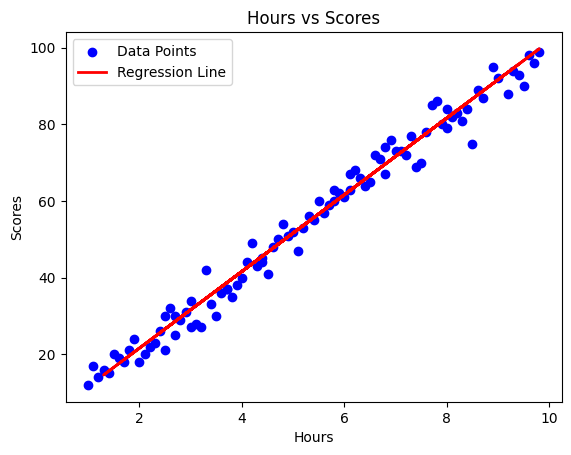

In [63]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, preds, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.legend()
plt.show()

In [64]:
def model_performance(model):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"The root mean squared error: {rmse} \n")

    mse = mean_squared_error(y_test, preds)

    print(f"The mean squared error: {mse} \n")

    r2score = r2_score(y_test, preds)

    print(f"The R2_score of the model is: {r2score}")

In [65]:
model2 = DecisionTreeRegressor()

In [66]:
model_performance(model2)

The root mean squared error: 4.6475800154489 

The mean squared error: 21.6 

The R2_score of the model is: 0.964817838658843


In [67]:
model3 = RandomForestRegressor()

In [68]:
model_performance(model3)

The root mean squared error: 4.096200649009328 

The mean squared error: 16.778859756944435 

The R2_score of the model is: 0.9726705300421543


The model performed best using the linear regression model